In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

x = 2*np.random.rand(100,1)
y = 3*x + np.random.randn(100,1)

In [ ]:
data = pd.DataFrame({'X':x.flatten(), 'y':y.flatten()})
data

,X,y
0,1.097627,2.127731
1,1.430379,5.191963
2,1.205527,4.082243
3,1.089766,1.733055
4,0.847310,4.030181
...,...,...
95,0.366383,1.780743
96,1.173026,2.715668
97,0.040215,-0.568905
98,1.657880,4.518108


In [ ]:
data.head()

,X,y
0,1.097627,2.127731
1,1.430379,5.191963
2,1.205527,4.082243
3,1.089766,1.733055
4,0.847310,4.030181


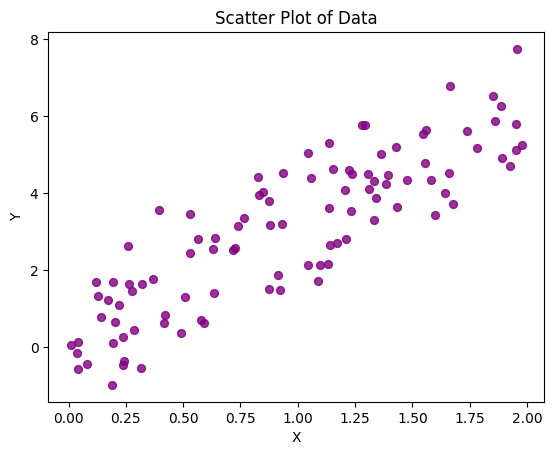

In [ ]:
data.plot(kind='scatter', x='X', y='y', color= 'purple', s=32, alpha=.8)
plt.title('Scatter Plot of Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
data.describe()

,X,y
count,100.000000,100.000000
mean,0.945588,3.029097
std,0.579508,1.990408
min,0.009391,-0.981128
25%,0.411606,1.489826
50%,0.934962,3.249952
75%,1.368967,4.510729
max,1.976748,7.754861


In [ ]:
#check missing values

data.isnull().sum()

X    0
y    0
dtype: int64

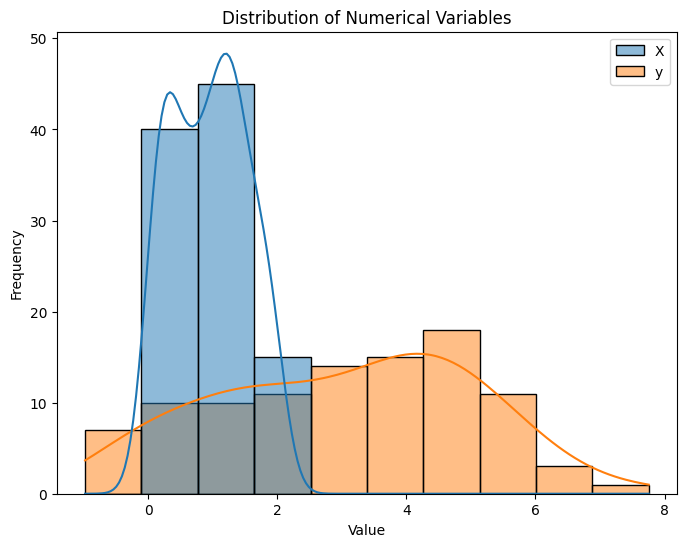

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, kde=True)
plt.title('Distribution of Numerical Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

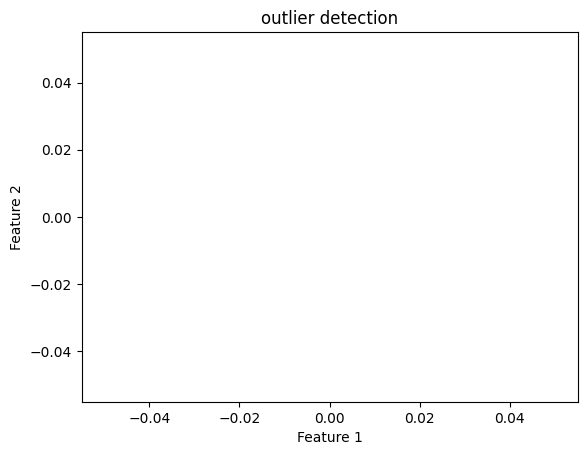

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(data))
outliers = np.where(z_scores > 3)

#Visualizing the outlier

plt.scatter(data.iloc[outliers[0],0], data.iloc[outliers[0],1], color='red')
plt.title('outlier detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Libraries for Basic modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data.head()


,X,y
0,1.097627,2.127731
1,1.430379,5.191963
2,1.205527,4.082243
3,1.089766,1.733055
4,0.847310,4.030181


In [ ]:
train_data, test_data = train_test_split(data, train_size=0.8, random_state=0)
print(test_data.shape,
      train_data.shape,
      data.shape)

(20, 2) (80, 2) (100, 2)


In [ ]:
#After splitting your data the next step is to find the M(the slope)
# to calculate that, we need to find the average of x and Y using
x_mean = np.mean(train_data['X'])
y_mean = np.mean(train_data['y'])
print(x_mean, y_mean)

0.9838076016353424 3.211281521806402


Calculate m for y = mx + c


In [ ]:
def grad_cal(data,x_mean,y_mean):
  numerator = 0
  denominator = 0
  for i in range(len(data)):
    numerator += (data['X'].iloc[i] - x_mean) * (data['y'].iloc[i] - y_mean)
    denominator += (data['X'].iloc[i]- x_mean)**2
  slope = numerator/denominator
  return slope

In [ ]:
m = grad_cal(train_data,x_mean,y_mean)
m

2.9364715078262456

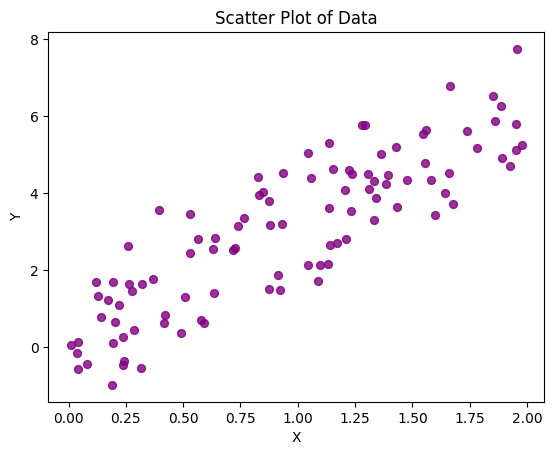

In [ ]:
data.plot(kind='scatter', x='X', y='y', color= 'purple', s=32, alpha=.8)
plt.title('Scatter Plot of Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# Then we calculate the intercept C

c = y_mean - (m*x_mean)
c

0.3223585304213459

In [ ]:
# making prediction on test data: y = mx + c

y_pred = m * test_data['X'] + c
y_pred

26    1.164264
86    3.395365
2     3.862353
55    1.269720
75    0.552506
93    4.529307
16    0.441100
73    3.874582
54    1.549080
95    1.398231
53    0.921662
92    1.096400
78    2.061573
13    5.758335
7     5.559691
30    1.876079
22    3.032601
24    1.016977
33    3.660739
8     5.981895
Name: X, dtype: float64

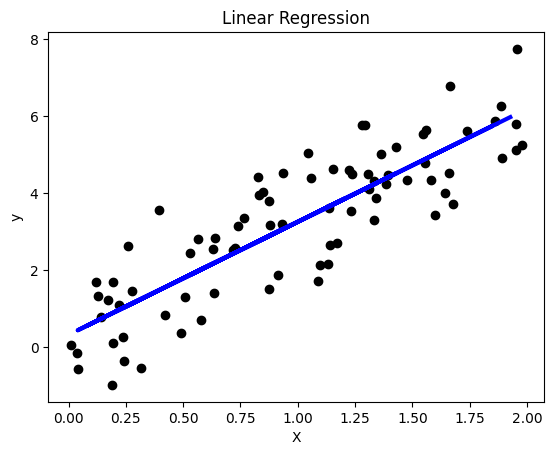

In [ ]:
# plotting the result

plt.scatter(train_data['X'], train_data['y'], color = 'black')
plt.plot(test_data['X'], y_pred, color = 'blue', linewidth = 3)
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
#Evaluating the model using MSE and Rsquared metrics
#finding MSE using numpy
mse = np.mean((test_data['y'] - y_pred)**2)

#finding R_squared using numpy
r2 = 1 - (np.sum((test_data['y'] - y_pred) ** 2) / np.sum((test_data['y'] - np.mean(test_data['y'])) ** 2))

print("The Mean Squared Error using numpy:", mse)
print("The R_Squared using numpy:", r2)

#finding the MSE using sklearn
mse2= mean_squared_error(test_data['y'], y_pred)

#finding the r_squared using the sklearn
rs2= r_squared = r2_score(test_data['y'], y_pred)

print("The Mean Squared Error using sklearn:", mse2)
print("The R_Squared using sklearn:", rs2)

The Mean Squared Error using numpy: 1.0434333815695174
The R_Squared using numpy: 0.7424452332071365
The Mean Squared Error using sklearn: 1.0434333815695174
The R_Squared using sklearn: 0.7424452332071365


SECOND METHOD


In [ ]:
#To select the particular variables we are intersted in

X = data.drop('y',axis = 1)
y = data['y']

In [ ]:
X.head()

,X
0,1.097627
1,1.430379
2,1.205527
3,1.089766
4,0.847310


In [ ]:
y.head(2)

0    2.127731
1    5.191963
Name: y, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape
X_test.shape

(20, 1)

In [ ]:
#Creating the model

model = LinearRegression()

In [ ]:
#Predicting the test data
y_pred = model.predict(X_test)

In [ ]:
#Evaluating your prediction
mse_new = mean_squared_error(y_test, y_pred)
r2_new = r2_score(y_test, y_pred)

print(mse_new)
print(r2_new)

1.043433381569517
0.7424452332071367
